In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

plt.style.use('ggplot')

In [137]:
data = pd.read_csv('output-data.csv')
print(data.shape)
data.head()

(18403, 18)


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [12]:
data.describe()

,Score,Release Year,Release Year 2,matched,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,18403.000000,18078.000000,595.000000,18403.0,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000
mean,7.033255,2009.315411,2009.275630,1.0,0.510635,0.600806,5.215836,-9.318390,0.650245,0.091125,0.302895,0.278616,0.196500,0.404326,120.289697
std,1.251850,7.708710,5.284626,0.0,0.159833,0.204257,1.619708,4.264038,0.249390,0.092428,0.263730,0.300740,0.105458,0.183464,15.613327
min,0.000000,1957.000000,1982.000000,1.0,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.500000,2005.000000,2005.000000,1.0,0.405784,0.471787,4.333333,-11.248350,0.500000,0.040704,0.089842,0.010060,0.134153,0.271800,111.193425
50%,7.300000,2010.000000,2009.000000,1.0,0.510417,0.624364,5.230769,-8.492333,0.666667,0.056808,0.229806,0.153433,0.174350,0.405313,120.367385
75%,7.800000,2015.000000,2014.000000,1.0,0.622000,0.750586,6.100000,-6.416397,0.833333,0.100029,0.463416,0.506816,0.228890,0.532203,129.098775
max,10.000000,2019.000000,2017.000000,1.0,0.974000,0.999000,11.000000,4.078000,1.000000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


In [13]:
# First, dropping the "Unnamed 0" column; its a left over from data pulling

#data = data.drop('Unnamed: 0', axis=1)

# We'll also drop "Release Year 2"; this is when an album was re-released, 
# so P4K reviewed it the second time around -- we don't care about those albums

data = data.drop('Release Year 2', axis=1)

# We'll drop "artist_uri"; this is an internal pointer to Spotify that we don't need

data = data.drop('artist_uri', axis=1)

# Finally, we'll dropped "matched"; this was used to match albums between P4K and Spotify

data = data.drop('matched', axis=1)

# We'll also drop accolade, for now

data = data.drop('Accolade', axis=1)

data = data.drop('mode', axis=1)

# Last, let's drop tahis spotify_response column

data = data.drop('spotify_response', axis=1)

data = data.drop('album_uri', axis=1)

In [14]:
columns = ['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate', 'recordlabel',
          'genre', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness',
          'instrumentalness', 'liveness', 'valence', 'tempo']

# Next, we'll rename the columns to make them easier to work with (eliminating spaces and uppercase)

#columns = ['artist', 'album', 'reviewauthor', 'score', 'accolade', 'releaseyear', 'reviewdate', 'recordlabel',
#          'genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#          'instrumentalness', 'liveness', 'valence', 'tempo']
data.columns = columns

In [15]:
print(data.shape)
data.head()

(18403, 18)


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [136]:
data[data.reviewdate == data.reviewdate.min()]

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2584,Son Ambulance,Euphemystic,Rob Mitchum,6.2,2001.0,April 1 2002,Saddle Creek,Folk/Country,0.421000,0.429100,4.700000,-11.365700,0.039240,0.459300,0.245826,0.149630,0.297000,119.144000
4314,Okkervil River,Don't Fall in Love with Everyone You See,Chris Dahlen,7.2,2002.0,April 1 2002,Jagjaguwar,Rock,0.392333,0.533667,5.777778,-7.679444,0.046822,0.637889,0.017217,0.169456,0.302222,126.144000
10207,The Get Up Kids,Eudora,Brad Haywood & Ryan Schreiber,3.1,2001.0,April 1 2002,Vagrant,Rock,0.360059,0.892118,4.823529,-5.249588,0.066176,0.036271,0.204558,0.198882,0.543176,132.425765


In [16]:
export_csv = data.to_csv (r'./output-data.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

count    18403.000000
mean         7.033255
std          1.251850
min          0.000000
25%          6.500000
50%          7.300000
75%          7.800000
max         10.000000
Name: score, dtype: float64

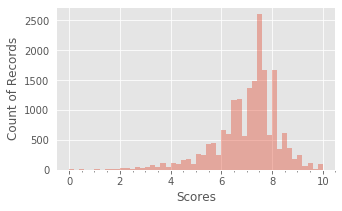

In [112]:
all_scores = sns.distplot(data.score, kde=False)
plt.xlabel('Scores')
plt.ylabel('Count of Records')
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', left=False)

fig = all_scores.get_figure()
fig.set_size_inches(5, 3)

fig.savefig('score-distribution.png', dpi=100)

data.score.describe()

#data.score.describe()

The number of reviewers is: 564
The average number of reviews per author: 32.62943262411348
count    564.000000
mean      32.629433
std       77.301991
min        1.000000
25%        2.000000
50%        7.000000
75%       25.000000
max      749.000000
Name: reviewauthor, dtype: float64
Ian Cohen             749
Stephen M. Deusner    634
Joe Tangari           617
Stuart Berman         506
Mark Richardson       501
Name: reviewauthor, dtype: int64


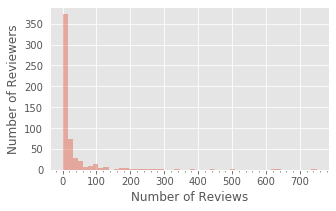

In [117]:
x = data.reviewauthor.nunique()
y = len(data)

print('The number of reviewers is: ' + str(data.reviewauthor.nunique()))
print('The average number of reviews per author: ' + str(y/x))

all_authors = data.reviewauthor.value_counts()
print(all_authors.describe())
g = sns.distplot(all_authors, kde=False)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Reviewers')

plt.minorticks_on()

fig = g.get_figure()
fig.set_size_inches(5, 3)
fig.savefig('reviewer-distribution.png', dpi=100)

In [133]:
print(all_authors.head(44).sum())
print(all_authors.head(45).sum())

all_authors.head(45)



10720
10819


Ian Cohen               749
Stephen M. Deusner      634
Joe Tangari             617
Stuart Berman           506
Mark Richardson         501
Brian Howe              438
Marc Hogan              388
Philip Sherburne        337
Jayson Greene           299
Andy Beta               298
Marc Masters            291
Nate Patrin             280
Brandon Stosuy          258
Grayson Currin          250
Jason Crock             232
Larry Fitzmaurice       228
Andrew Gaerig           226
Matthew Murphy          219
Paul Thompson           211
Jess Harvell            204
Rob Mitchum             202
Dominique Leone         194
Grayson Haver Currin    184
Adam Moerder            182
Joshua Klein            181
Tom Breihan             176
Nick Neyland            176
Amanda Petrusich        175
Sheldon Pearce          168
Matt LeMay              166
Chris Dahlen            164
Ryan Dombal             156
Zach Kelly              131
Sam Ubl                 130
Mike Powell             128
David Raposa        

Rock            6879
Electronic      3659
Experimental    1669
Rap             1644
Pop/R&B         1298
Metal            762
Folk/Country     748
Jazz             282
Global           162
none              11
Name: genre, dtype: int64


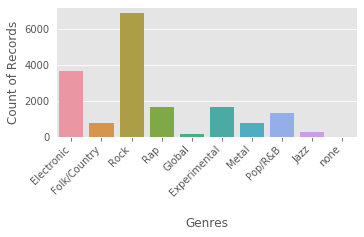

In [114]:
x = data.genre.value_counts()
print(x)
genres = sns.countplot(x='genre', data=data)
genres.set_xticklabels(genres.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('\nGenres')
plt.ylabel('Count of Records')
plt.tight_layout()
fig = genres.get_figure()
fig.set_size_inches(5, 3)
fig.savefig('genre-distribution.png', dpi=100)

In [115]:
data[data['genre'] == 'none']

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
17859,Space Dimension Controller,Love Beyond the Intersect,Philip Sherburne,6.2,2019.0,November 26 2019,none,none,0.652545,0.500836,6.727273,-17.867000,0.067545,0.108117,0.714545,0.385091,0.303255,111.209182
17866,Lamin Fofana,Black Metamorphosis,Philip Sherburne,7.2,2019.0,November 23 2019,none,none,0.686778,0.379000,6.111111,-14.875000,0.069689,0.029847,0.839444,0.122122,0.192878,116.176111
17897,Have a Nice Life,Sea of Worry,Arielle Gordon,7.4,2019.0,November 12 2019,none,none,0.334000,0.545286,5.285714,-15.499143,0.051300,0.213095,0.615543,0.229757,0.334886,135.200000
17898,Hiro Kone,A Fossil Begins to Bray,Shawn Reynaldo,8.0,2019.0,November 12 2019,none,none,0.382000,0.628000,5.125000,-10.503625,0.058675,0.041506,0.823875,0.249163,0.083450,123.463375
17943,Jonathan Fire*Eater,Tremble Under Boom Lights,Paul Thompson,8.0,2019.0,October 26 2019,none,none,0.439200,0.775100,6.900000,-7.728300,0.054060,0.093338,0.011315,0.238840,0.611100,123.879200
17971,Richard Dawson,2020,Sam Sodomsky,7.8,2019.0,October 17 2019,none,none,0.643000,0.613000,10.000000,-6.297000,0.085300,0.334000,0.000025,0.144000,0.520000,153.853000
18024,Somos,Prison on a Hill,Ian Cohen,7.4,2019.0,October 1 2019,none,none,0.474833,0.884833,4.750000,-4.496250,0.052558,0.014564,0.000882,0.309225,0.440833,141.143583
18145,Nick Catchdubs,UFO,Phillip Mlynar,6.6,2019.0,August 20 2019,none,none,0.772500,0.710500,3.500000,-6.896500,0.069450,0.078850,0.359280,0.145000,0.265000,139.040500
18192,Leech,Data Horde,Fred Thomas,7.4,2019.0,August 5 2019,none,none,0.595667,0.572833,5.333333,-15.706000,0.057483,0.211397,0.817000,0.272500,0.496667,152.646000
18217,Cherubs,Immaculada High,Chris O'Connell,7.9,2019.0,July 27 2019,none,none,0.375455,0.755182,7.909091,-10.109091,0.047245,0.000565,0.852091,0.227309,0.280000,101.161455


The earliest published album in the dataset is from: 1957.0
The most recently published album in the dataset is from: 2019.0


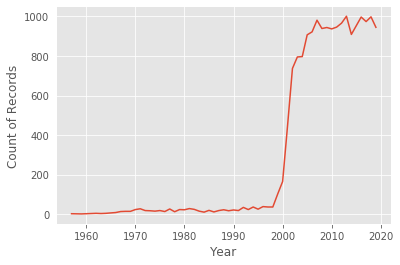

In [103]:
print('The earliest published album in the dataset is from: ' + str(data.releaseyear.min()))
print('The most recently published album in the dataset is from: ' + str(data.releaseyear.max()))


year_number = data.releaseyear.value_counts()
#print(year_number)
x = pd.DataFrame(year_number)

x = x.reset_index()

x['index'] = pd.to_datetime(x['index'].map('{:.0f}'.format), format='%Y.')
x = x.set_index('releaseyear')


x.columns = ['year']
x = x.reset_index()
x.columns = ['count', 'releaseyear']
x = x.sort_values('releaseyear', ascending=True)

years = plt.plot(x['releaseyear'], x['count'])

#fig= plt.figure(figsize=(7,5))

#plt.xlim('1958-01-01','2018-01-01')

plt.xlabel('Year')
plt.ylabel('Count of Records')
#plt.figure(figsize=(7,5))

plt.savefig('review-count-distribution.png', dpi=100)

#x
#g = sns.lineplot(x.count, x.releaseyear)

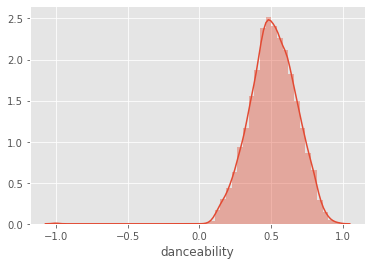

In [21]:
g = sns.distplot(data.danceability)

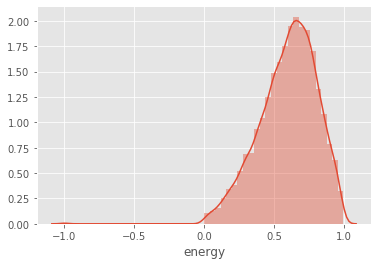

In [22]:
g = sns.distplot(data.energy)

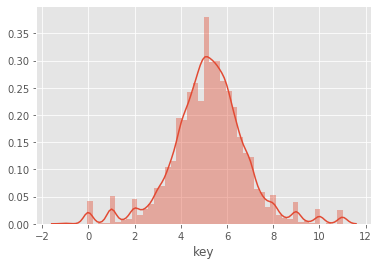

In [23]:
g = sns.distplot(data.key)

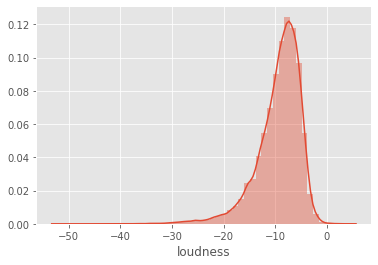

In [24]:
g = sns.distplot(data.loudness)

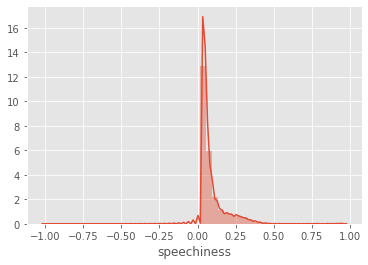

In [25]:
g = sns.distplot(data.speechiness)

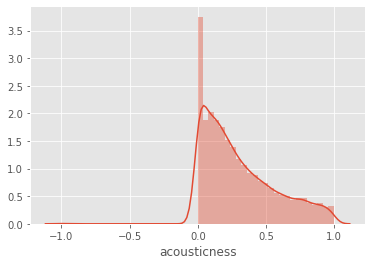

In [26]:
g = sns.distplot(data.acousticness)

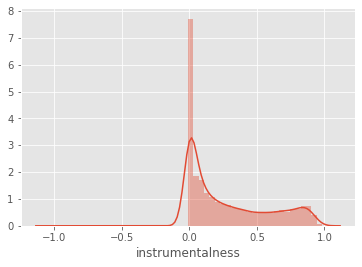

In [27]:
g = sns.distplot(data.instrumentalness)

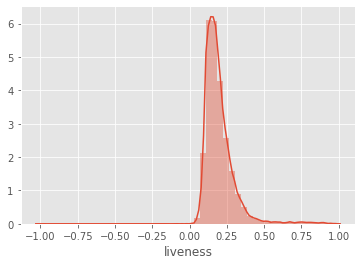

In [28]:
g = sns.distplot(data.liveness)

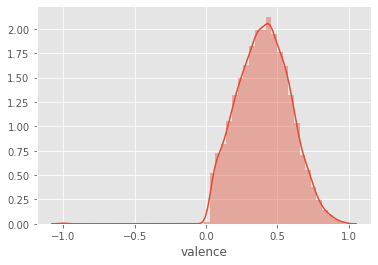

In [29]:
g = sns.distplot(data.valence)

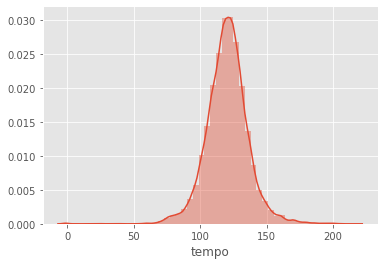

In [30]:
g = sns.distplot(data.tempo)